In [20]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
experiments_path = "experiments"
run = 6

In [22]:
def read_statistics_data(experiments_path, run):
    path = f"{experiments_path}/run_{run}/statistics"
    files = os.listdir(path)
    dataframes = []
    for f in files:
        df = pd.read_csv(f"{path}/{f}", delimiter='\t')
        df['generation'] = int(f.split(os.sep)[-1].replace('generation_','').replace('.csv',''))
        dataframes.append(df)
    return pd.concat(dataframes).reset_index(drop=True)
    

In [34]:
stats_df = read_statistics_data(experiments_path, run)

In [35]:
stats_df.head(5)

,id,phenotype,fitness,num_epochs,training_time_spent,training_time,is_valid_solution,fitness.1,n_trainable_parameters,n_layers,training_time_spent.1,n_epochs,generation
0,0,layer:pool_avg kernel_size:5 stride:3 padding:...,0.776971,5,26.027531,20,True,0.776971,447303,3,9.903424,2,9
1,1,layer:pool_avg kernel_size:5 stride:3 padding:...,0.846844,5,26.952096,20,True,0.846844,447303,3,20.256618,4,9
2,2,layer:pool_avg kernel_size:5 stride:3 padding:...,0.673558,1,6.455412,5,True,0.673558,447303,3,6.455412,1,9
3,3,layer:pool_avg kernel_size:5 stride:3 padding:...,0.798750,5,6.233362,20,True,0.798750,447303,3,6.233362,1,9
4,4,layer:pool_avg kernel_size:5 stride:3 padding:...,0.778383,5,7.696588,20,True,0.778383,447303,3,7.696588,1,9


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

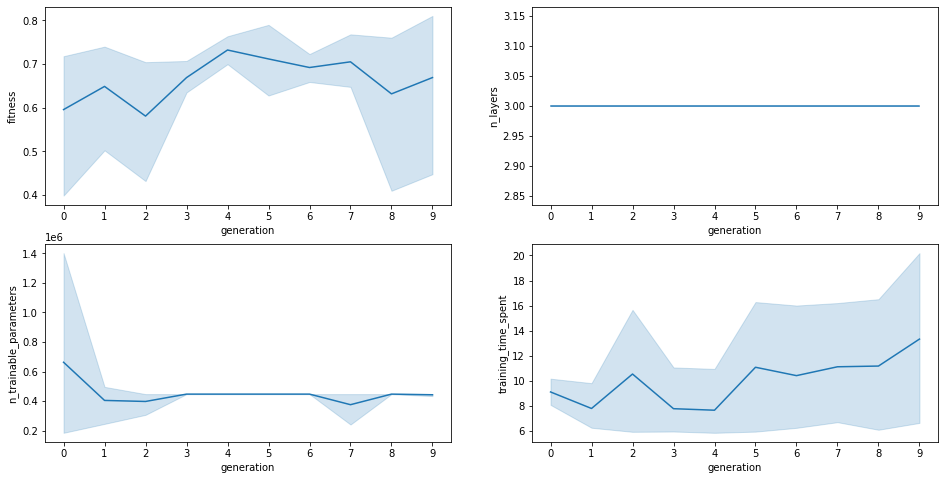

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)

In [ ]:
# add best overall fitness